In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplot2tikz

In [2]:
data = pd.read_csv('../log/20250603.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])

data['p_n'] = data.dataset.apply(lambda x : x.split('_')[-1])
data['dataset'] = data.dataset.apply(lambda x : '_'.join(x.split('_')[:-1]))

data_b = pd.read_csv('../log/20250521_ms_2.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data_b['pi'] = '0.3'

data2 = pd.read_csv('../log/20250530.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data2['pi'] = data2.dataset.apply(lambda x: x.split('_')[-2])
data2['dataset'] = data2.dataset.apply(lambda x: x.split('_')[0])
data2.replace({'concrete':'concrete_strength'},inplace = True)
data_b = pd.concat((data_b, data2))

In [3]:
data_b

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,pi
0,bioav,32.627193,36.258366,1146,1,4,5,0,305.242281,0.3
1,bioav,32.627193,36.258366,1146,1,4,5,1,0.065056,0.3
2,bioav,32.390675,34.005520,783,2,4,5,2,0.051694,0.3
3,bioav,32.390675,34.005520,783,2,4,5,3,0.060445,0.3
4,bioav,32.224144,33.589134,1057,3,4,5,4,0.048921,0.3
...,...,...,...,...,...,...,...,...,...,...
160075,airfoil,3.980446,4.214525,45903,873,4,3,1998,0.538851,0.7
160076,airfoil,4.072845,4.416686,48929,879,4,6,1999,0.464977,0.7
160077,airfoil,3.980446,4.214525,45903,873,4,3,1999,0.890781,0.7
160078,airfoil,4.072845,4.416686,48929,879,4,6,2000,0.478387,0.7


In [4]:
data_b.pi.unique()

array(['0.3', '0.5', '0.7'], dtype=object)

In [5]:
data_b = data_b[
    (
        data_b['dataset'].isin(['airfoil', 'concrete_strength']) & 
        (data_b['pi'] == '0.5')
    ) 
| (
        ~data_b['dataset'].isin(['airfoil', 'concrete_strength']) & 
        (data_b['pi'] == '0.3')
    )
]


In [6]:
data_b.drop(labels = 'pi', axis = 1,  inplace = True)

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_19716\3336860715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b.drop(labels = 'pi', axis = 1,  inplace = True)


In [7]:
data_b['p_n'] = '1'

C:\Users\dfarinati\AppData\Local\Temp\ipykernel_19716\3259630730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b['p_n'] = '1'


In [8]:
data = pd.concat((data, data_b))

In [9]:
data.p_n.unique()

array(['0.2', '0.5', '0.7', '1'], dtype=object)

In [10]:
data.tail()

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,p_n
140065,airfoil,4.087175,4.327202,22914,406,4,6,1996,0.189389,1
140066,airfoil,4.087175,4.327202,22914,406,4,6,1997,0.170695,1
140067,airfoil,4.087175,4.327202,22914,406,4,6,1998,0.172856,1
140068,airfoil,4.087175,4.327202,22914,406,4,6,1999,0.167169,1
140069,airfoil,4.087175,4.327202,22914,406,4,6,2000,0.157413,1


In [11]:
data.head()

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,p_n
0,bioav,22.188988,38.854683,3304,1,4,0,0,81.596654,0.2
1,bioav,20.949617,35.341579,3387,1,3,2,0,107.598373,0.2
2,bioav,20.949617,35.341579,3387,1,3,2,1,0.067309,0.2
3,bioav,20.949617,35.341579,3387,1,3,2,2,0.062621,0.2
4,bioav,20.949617,35.341579,3387,1,3,2,3,0.084932,0.2


In [12]:
baseline_final = pd.read_csv('../log/baseline_20250526.csv', names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [13]:
baseline_evo =  pd.read_csv('../log/baseline_evo_20250526.csv', names = ['dataset', 'train_fitness', 'val_fitness', 'test_fitness', 'seed','epoch', 'timing'])
baseline_evo.dropna(axis = 0, inplace = True)

In [14]:
colors = ['#FF0000', '#0000FF', '#008000', '#800080']
light_colors = ['#F08080', '#87CEFA', '#90EE90', '#DDA0DD']

In [15]:
pns = data.p_n.unique()
datas = data.dataset.unique()

In [16]:
baseline_final.head()

,dataset,test_fitness,seed,epoch,timing
0,bioav,68.954971,8,1000,663.274803
1,bioav,30.779556,9,1000,665.926589
2,bioav,28.992313,6,1000,668.576831
3,bioav,28.697771,2,1000,684.833575
4,bioav,67.865662,5,1000,687.051019


In [20]:
# limits = {'bioav' : (10,40), 'ld50' : (1750, 2550), 'concrete_strength' : (4, 18), 'airfoil' : (3, 10)}
data = data.query('generation < 2000')
data = data.query('generation%3 == 0')

% This file was created with matplot2tikz v0.3.2.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{green}{RGB}{0,128,0}
\definecolor{purple}{RGB}{128,0,128}

\begin{groupplot}[group style={group size=2 by 2}]
\nextgroupplot[
tick align=outside,
tick pos=left,
title={bioav},
x grid style={darkgray176},
xlabel={Generation},
xmin=-99.9, xmax=2097.9,
xtick style={color=black},
y grid style={darkgray176},
ylabel={RMSE},
ymin=16.9588541984558, ymax=37.4082551002502,
ytick style={color=black}
]
\addplot [semithick, red]
table {%
0 21.8212280273438
3 21.4967193603516
6 21.4834976196289
9 21.4716548919678
12 21.4559316635132
15 21.4481801986694
18 21.4460477828979
21 21.4087915420532
24 21.4075803756714
27 21.4069576263428
30 21.4004430770874
33 21.3884315490723
36 21.3871212005615
39 21.3852195739746
42 21.3852186203003
45 21.3800506591797
48 21.3797388076782
51 21.3787937164307
54 21.3763809204102
57 21.3673439025879
60 21.365044593811
63 21.3559875488281
66 21.34

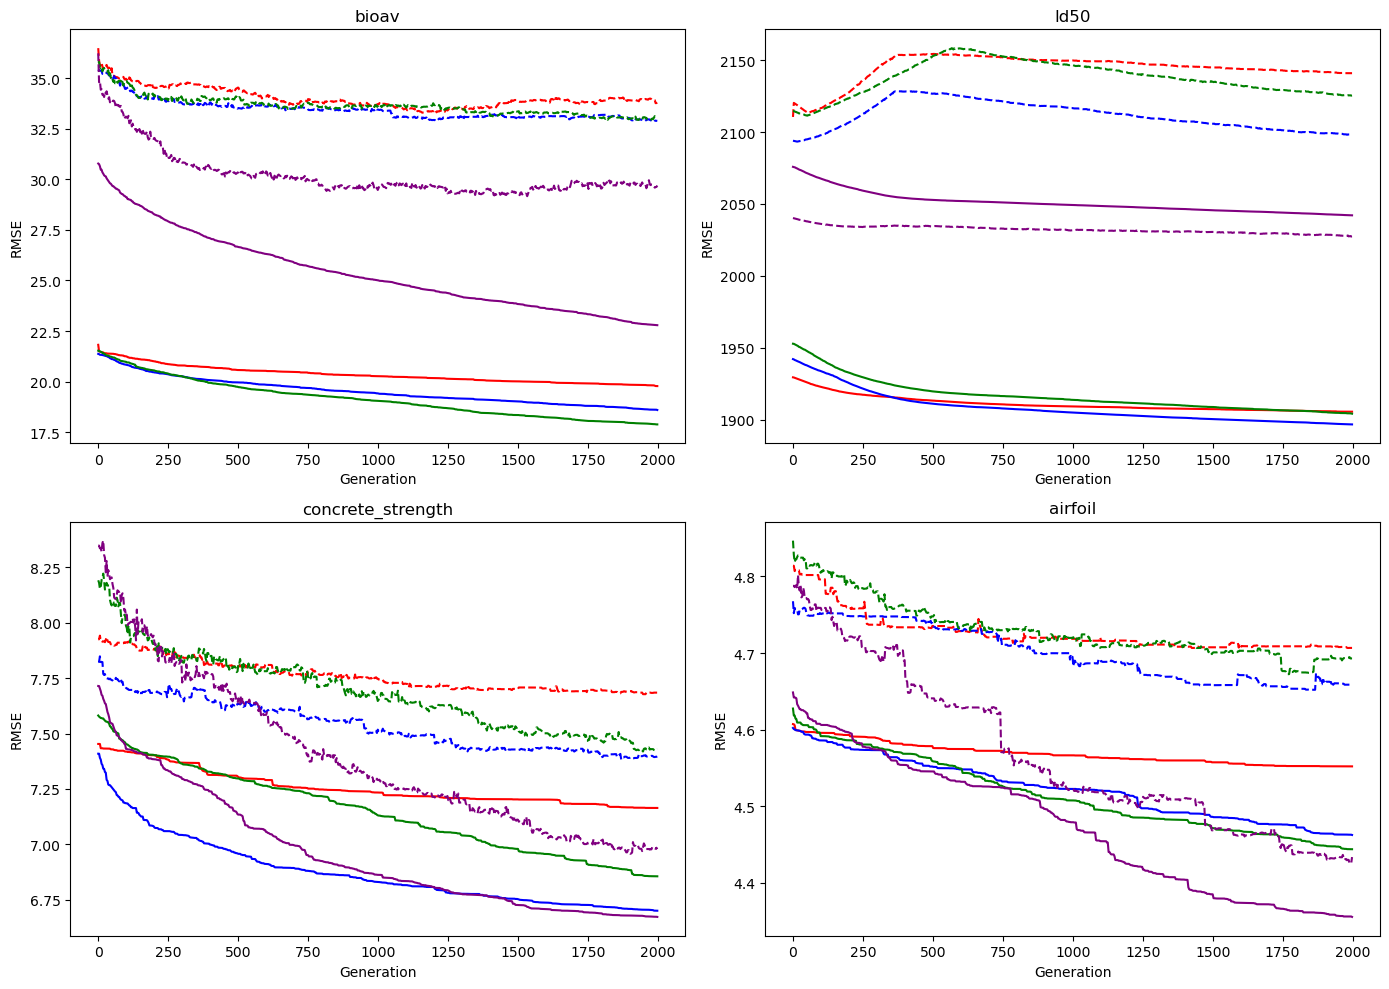

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()



for idx, dataset in enumerate(datas):
    ax = axes[idx]

    for i, pn in enumerate(pns):
        grouped = data[(data['dataset'] == dataset) & (data['p_n'] == pn)][
            ['train_fitness', 'test_fitness', 'generation']
        ].groupby('generation').median()

        

        ax.plot(grouped.index, grouped.train_fitness, label=f'{pn} train', color=colors[i])
        ax.plot(grouped.index, grouped.test_fitness, linestyle='dashed', color=colors[i], label=f'{pn} test')

    # ax.set_ylim(limits[dataset])
    ax.set_title(dataset)
    ax.set_xlabel('Generation')
    ax.set_ylabel('RMSE')
    # ax.legend(fontsize='small')

plt.tight_layout()
# plt.show()
print(matplot2tikz.get_tikz_code())


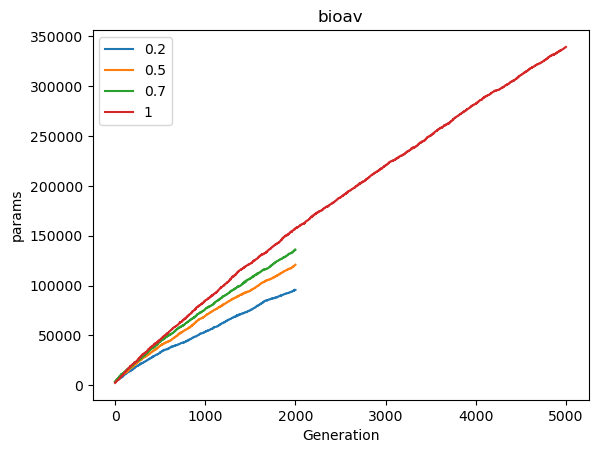

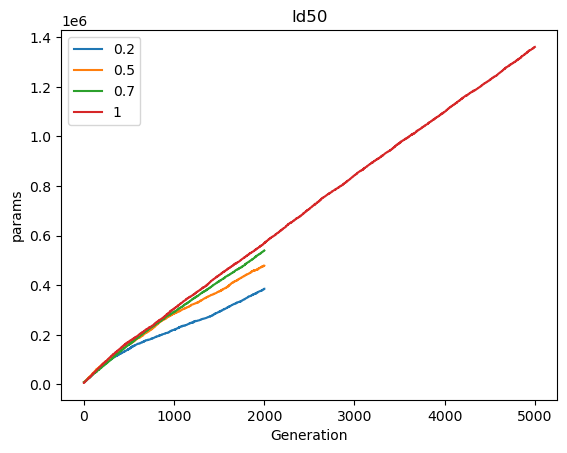

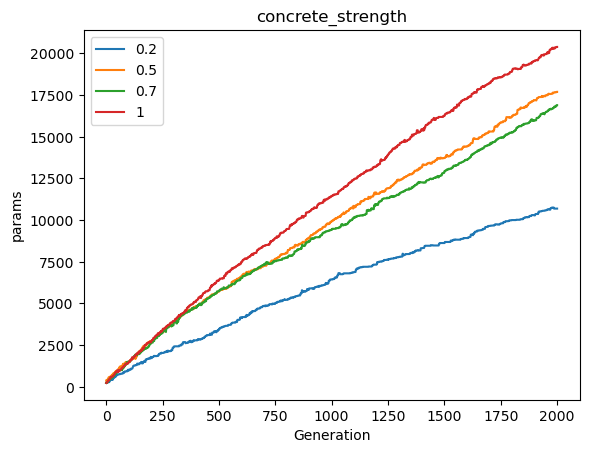

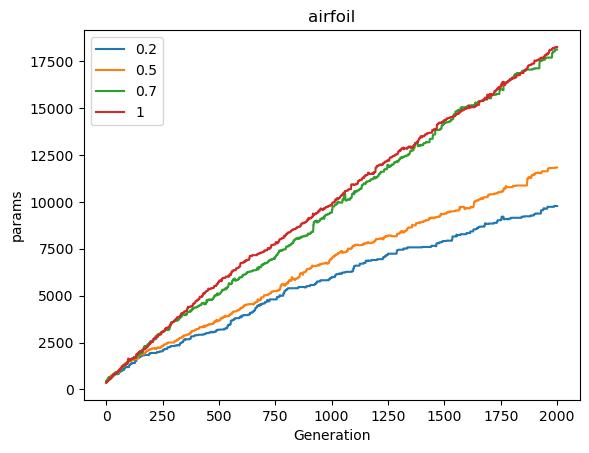

In [48]:
for dataset in datas:
    for i, pn in enumerate(pns):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['p_n'] == pn)][
                        ['parameters', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.parameters, label = pn)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('params')
    plt.legend()
    plt.show()

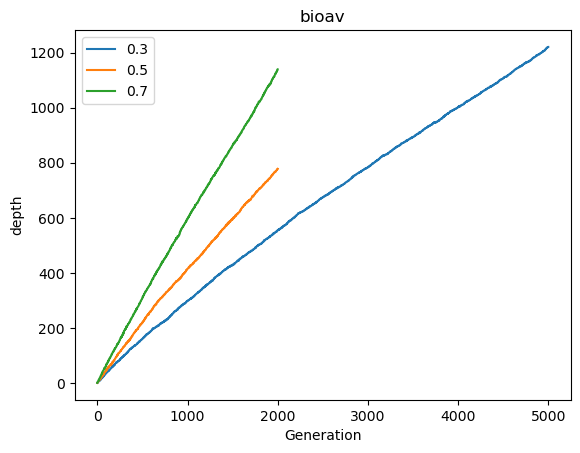

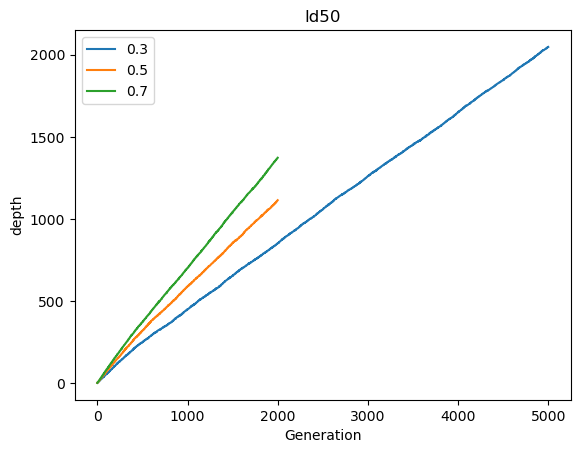

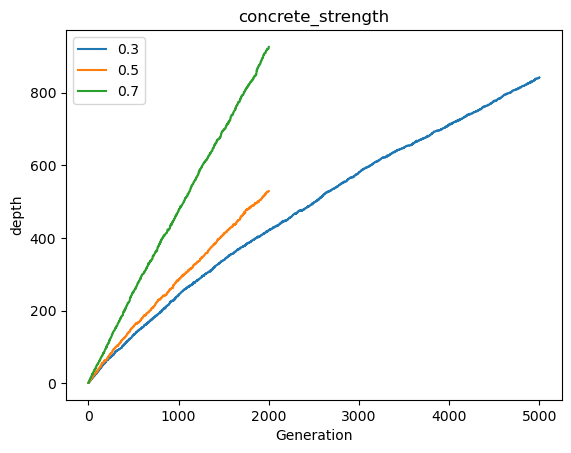

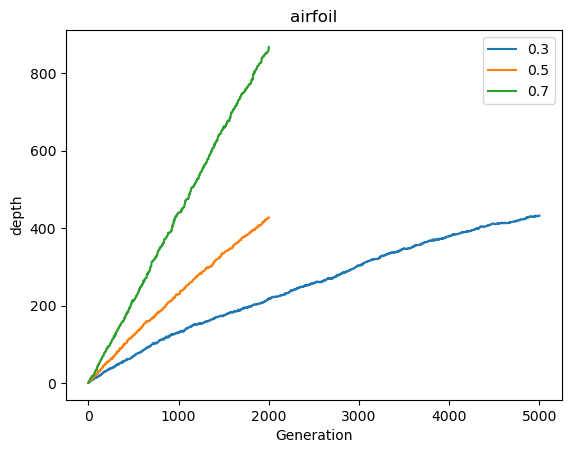

In [49]:
for dataset in datas:
    for i, pi in enumerate(pis):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['pi'] == pi)][
                        ['depth', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.depth, label = pi)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('depth')
    plt.legend()
    plt.show()

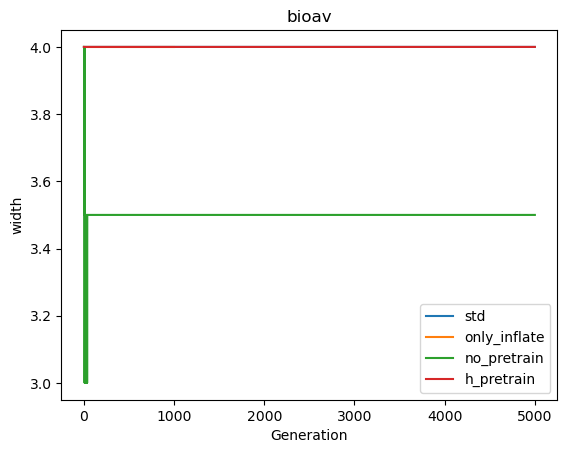

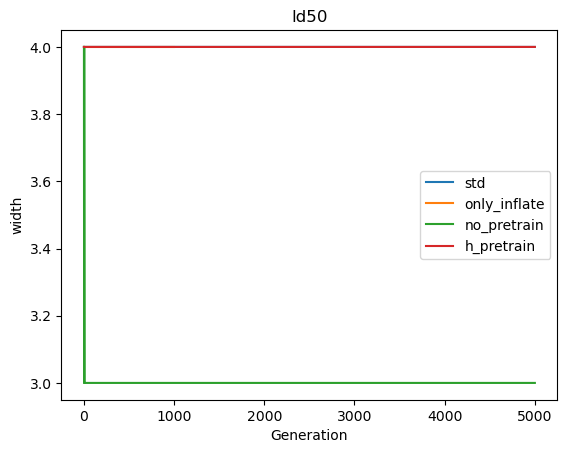

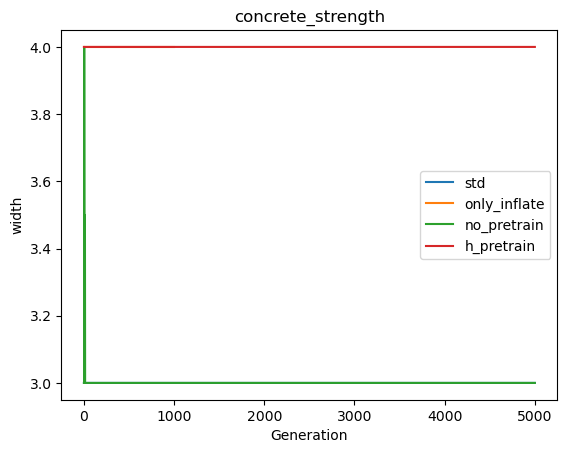

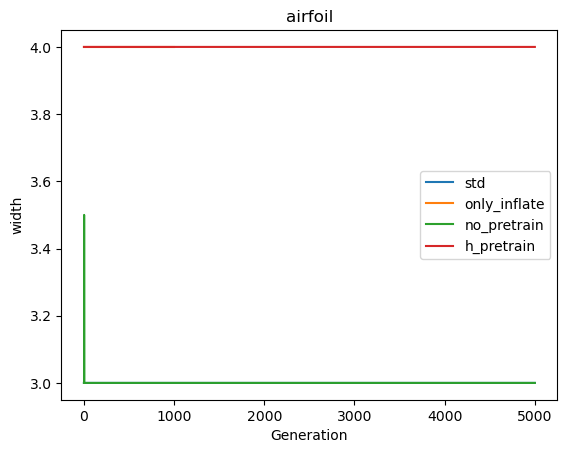

In [15]:
for dataset in datas:
    for i, var in enumerate(variants):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['variant'] == var)][
                        ['width', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.width, label = var)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('width')
    plt.legend()
    plt.show()

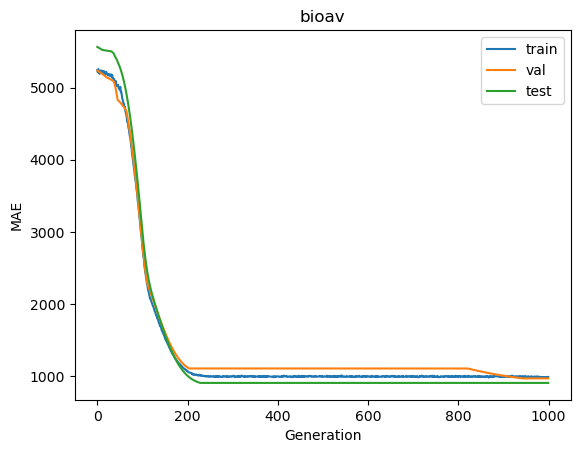

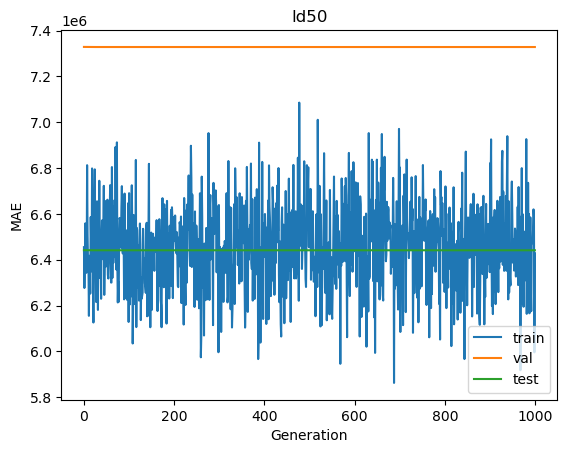

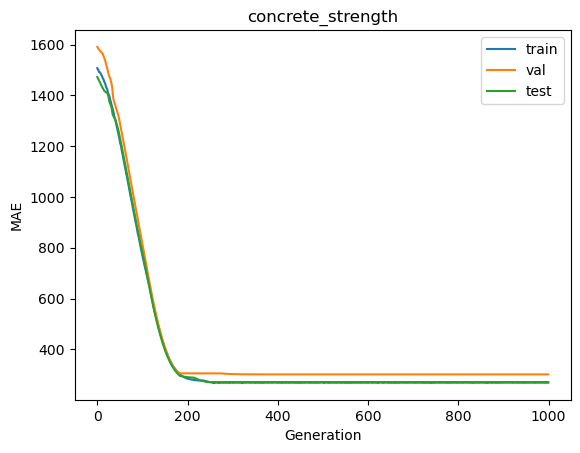

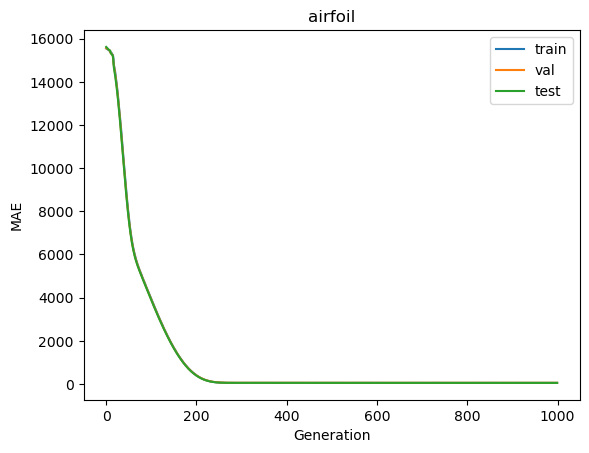

In [16]:
for dataset in datas:
        
    grouped = baseline_evo[(baseline_evo['dataset'] == dataset)][
                    ['train_fitness', 'val_fitness', 'test_fitness', 'epoch']].groupby('epoch').median()
    
    plt.plot(grouped.index, grouped.train_fitness, label = 'train')
    plt.plot(grouped.index, grouped.val_fitness, label = 'val') # label = 'test',
    plt.plot(grouped.index, grouped.test_fitness, label = 'test')


    # baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    
    # plt.plot([i for i in range(5000)], [baseline for _ in range(5000)], color = 'black', linestyle = 'dotted', label = 'NN baseline')

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()